In [607]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
# from sklearn.metrics import euclidean_distances, manhattan_distances
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances

from sklearn.decomposition import PCA

import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(15,10)})

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

In [374]:
# Importar dados

df_original = pd.read_csv('Base mesclada.csv')
print('Quantidade variaveis na base original {}'.format(df_original.columns.shape[0]))
df_original.head()

Quantidade variaveis na base original 82


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [375]:
# Importar variáveis não métricas já selecionadas e com as respectivas notas
notas_var_n_metricas = pd.read_csv('variaveis_nao_metricas.csv',sep=';')

# Transformar todos os valores do campo Valor em string
notas_var_n_metricas['Valor'] = notas_var_n_metricas['Valor'].apply(lambda x:str(x))

# Tirar espacos em branco
notas_var_n_metricas['Valor'] = notas_var_n_metricas['Valor'].apply(lambda x:x.strip())

In [376]:
# Selecionar as variáveis não numéricas
df_non_numerical = df_original[notas_var_n_metricas['Coluna'].unique()]
print(df_non_numerical.shape)
df_non_numerical.head()

(2919, 23)


,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,...,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,Reg,Lvl,AllPub,Gtl,7,5,Gd,TA,Gd,TA,...,Ex,Gd,Typ,NaN,RFn,TA,TA,Y,NaN,NaN
1,Reg,Lvl,AllPub,Gtl,6,8,TA,TA,Gd,TA,...,Ex,TA,Typ,TA,RFn,TA,TA,Y,NaN,NaN
2,IR1,Lvl,AllPub,Gtl,7,5,Gd,TA,Gd,TA,...,Ex,Gd,Typ,TA,RFn,TA,TA,Y,NaN,NaN
3,IR1,Lvl,AllPub,Gtl,7,5,TA,TA,TA,Gd,...,Gd,Gd,Typ,Gd,Unf,TA,TA,Y,NaN,NaN
4,IR1,Lvl,AllPub,Gtl,8,5,Gd,TA,Gd,TA,...,Ex,Gd,Typ,TA,RFn,TA,TA,Y,NaN,NaN


In [377]:
# Transformar todos os dados do dataframe em string
for c in df_non_numerical.columns:
    df_non_numerical[c] = df_non_numerical[c].apply(lambda x:str(x))

/var/folders/46/d1gyxnd907l7618h776pcl700000gp/T/ipykernel_4569/4131654076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_numerical[c] = df_non_numerical[c].apply(lambda x:str(x))


In [379]:
# para cada coluna do dataframe
for coluna in df_non_numerical.columns:
    # para cada valor da respectiva coluna
    for linha, valor in enumerate(df_non_numerical[coluna]):
        # tento
        try:
             #encontrar uma nota do respectivo valor
            valor = df_non_numerical[coluna][linha]
            df_non_numerical[coluna][linha] = int(notas_var_n_metricas[(notas_var_n_metricas['Coluna']==coluna) & (notas_var_n_metricas['Valor']==valor)]['Nota'])
        except:
            print("Coluna {} | Linha {} = ".format(coluna,linha), end='')
            print(df_non_numerical[coluna][linha])
            #df_non_numerical[coluna][linha] = int(notas_var_n_metricas[(notas_var_n_metricas['Coluna']==coluna) & (notas_var_n_metricas['Valor']==valor)]['Nota'])        

/var/folders/46/d1gyxnd907l7618h776pcl700000gp/T/ipykernel_4569/1471567284.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_numerical[coluna][linha] = int(notas_var_n_metricas[(notas_var_n_metricas['Coluna']==coluna) & (notas_var_n_metricas['Valor']==valor)]['Nota'])


Coluna Utilities | Linha 1915 = nan
Coluna Utilities | Linha 1945 = nan
Coluna KitchenQual | Linha 1555 = nan
Coluna Functional | Linha 2216 = nan
Coluna Functional | Linha 2473 = nan


In [396]:
(df_non_numerical == 'nan').apply(lambda x:np.any(x))

LotShape        False
LandContour     False
Utilities        True
LandSlope       False
OverallQual     False
OverallCond     False
ExterQual       False
ExterCond       False
BsmtQual        False
BsmtCond        False
BsmtExposure    False
BsmtFinType1    False
BsmtFinType2    False
HeatingQC       False
KitchenQual      True
Functional       True
FireplaceQu     False
GarageFinish    False
GarageQual      False
GarageCond      False
PavedDrive      False
PoolQC          False
Fence           False
dtype: bool

In [397]:
# Retiro os dados com nan
for c in df_non_numerical.columns:
    df_non_numerical = df_non_numerical[df_non_numerical[c] != 'nan']

In [399]:
df_non_numerical.head()

,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,...,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,0,0,0,0,3,5,1,2,1,2,...,0,1,0,5,1,2,2,0,4,4
1,0,0,0,0,4,2,2,2,1,2,...,0,2,0,2,1,2,2,0,4,4
2,1,0,0,0,3,5,1,2,1,2,...,0,1,0,2,1,2,2,0,4,4
3,1,0,0,0,3,5,2,2,2,1,...,1,1,0,1,2,2,2,0,4,4
4,1,0,0,0,2,5,1,2,1,2,...,0,1,0,2,1,2,2,0,4,4


# Primeira análise:

## Avaliação da similaridade entre variáveis não métricas

In [532]:
# Função para calcular os valores dos componentes do MDS e do seu stress
def calculo_NMDS(df_non_numerical, dimensao):
    similarities = euclidean_distances(df_non_numerical)
    nmds = manifold.MDS(
        n_components=dimensao,
        metric=False,
        max_iter=3000,
        eps=1e-12,
        dissimilarity="precomputed",
        random_state=1,
        n_jobs=1,
        n_init=1,
    )
    X_transform = nmds.fit_transform(similarities)
    stress = nmds.stress_
    return X_transform, stress

In [534]:
# Análise utilizando 2 componentes do MDS
X_transform, stress = calculo_NMDS(df_non_numerical.transpose(),2)
X_transform

array([[ 0.07408114,  0.22210443],
       [-0.41496112, -0.21623411],
       [-0.03600399, -0.49828716],
       [-0.15978598, -0.32085868],
       [ 0.12792933, -0.26826689],
       [ 0.20492667,  0.0737049 ],
       [-0.07825782,  0.43934133],
       [-0.31861746,  0.07778972],
       [ 0.15638648, -0.10322866],
       [ 0.02087038, -0.29354637],
       [ 0.20960049,  0.49808946],
       [ 0.01654192,  0.01835055],
       [ 0.41197441,  0.39374758],
       [-0.1836884 , -0.53169955],
       [-0.16441493,  0.49284506],
       [-0.19036465, -0.32244981],
       [ 0.59749629, -0.12014375],
       [ 0.29639471, -0.35503343],
       [ 0.23747874,  0.38206817],
       [-0.64094651,  0.31447595],
       [ 0.7678962 ,  0.21652371],
       [-0.25755749,  0.37176981],
       [-0.59999909, -0.28789631]])

Text(0.5, 0, 'Componente 2')

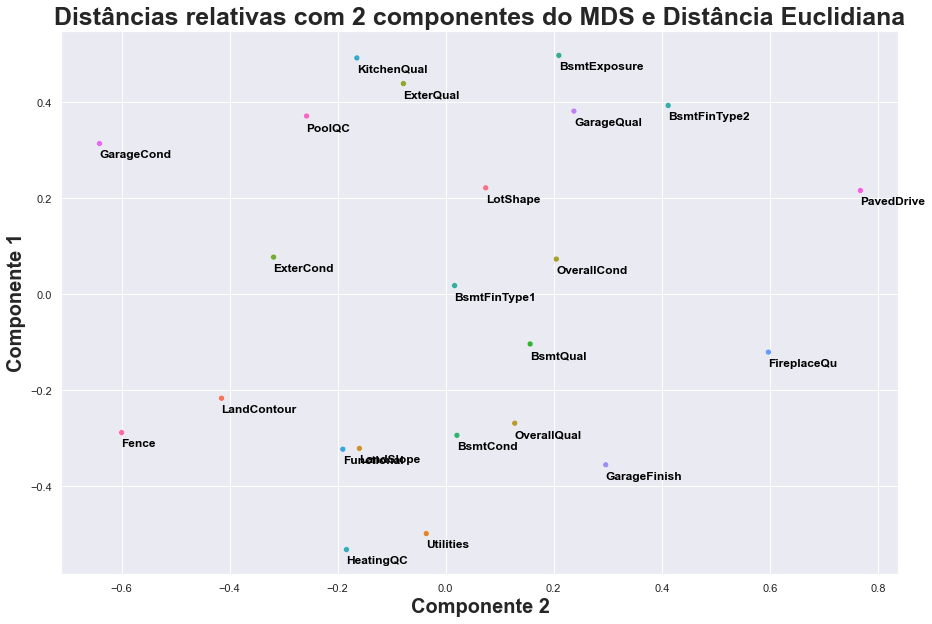

In [538]:
# sns.set_style('white')


df_points = pd.DataFrame(X_transform, index=df_non_numerical.columns).reset_index()

sns.scatterplot(data=df_points, x=0, y=1, hue='index', legend = False)

# add annotations one by one with a loop
for line in range(0,df_points.shape[0]):
     plt.text(df_points[0][line], df_points[1][line]-0.03, df_points['index'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Distâncias relativas com 2 componentes do MDS e Distância Euclidiana',fontdict = {'fontsize':25,'fontweight':'bold'})
plt.ylabel('Componente 1',fontdict = {'fontsize':20,'fontweight':'bold'})
plt.xlabel('Componente 2',fontdict = {'fontsize':20,'fontweight':'bold'})

In [655]:
df_non_numerical.columns

Index(['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'OverallQual',
       'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'],
      dtype='object')

**Este gráfico mostra as variáveis não métricas que são próximas entre si. Além disso, algumas se mostraram inusitadas como a grande proximidade entre KitchenQual e ExterQual, e entre Functional e LandSlope (EXPLICAR MELHOR ESTAS RELAÇÕES ASSIM COMO OUTRAS INTERESSANTES E ÓBVIAS!!!!)**

In [518]:
stress = nmds.stress_
print("Stress para 2 dimensões: {}".format(stress))

Stress para 2 dimensões: 11.054395652343462


**Tentar identificar o melhor número de componentes com baixo stress**

In [528]:
lista_stress = []
dimensao_max = 15
for dimensoes in range(1, dimensao_max):
        similarities = euclidean_distances(df_non_numerical.transpose())
        nmds = manifold.MDS(
            n_components=dimensoes,
            metric=False,
            max_iter=3000,
            eps=1e-12,
            dissimilarity="precomputed",
            random_state=1,
            n_jobs=1,
            n_init=1,
        )
        
        X_transform = nmds.fit_transform(similarities)
        stress = nmds.stress_
        lista_stress.append(stress)

Text(0.5, 0, 'Número de Componentes do MDS')

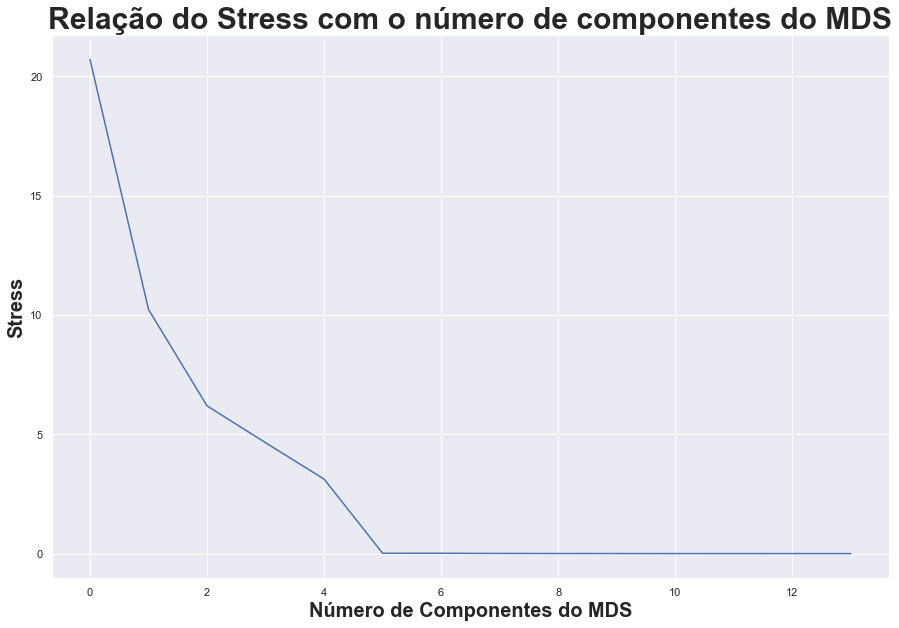

In [536]:
pd.DataFrame(lista_stress, columns=['Stress']).plot(kind='line', legend=False)
plt.title('Relação do Stress com o número de componentes do MDS',fontdict = {'fontsize':30,'fontweight':'bold'})
plt.ylabel('Stress',fontdict = {'fontsize':20,'fontweight':'bold'})
plt.xlabel('Número de Componentes do MDS',fontdict = {'fontsize':20,'fontweight':'bold'})

**Percebe-se que 5 é a melhor escolha como número de componentes do MDS**

# Melhorar a interpretabilidade utilizando kmeans

In [544]:
X_transform, stress = calculo_NMDS(df_non_numerical.transpose(),5)
df_X_transform = pd.DataFrame(X_transform)

Text(0.5, 1.0, 'Método do Cotovelo:\nGráfico que mostra a distorcao por k do Kmeans\n')

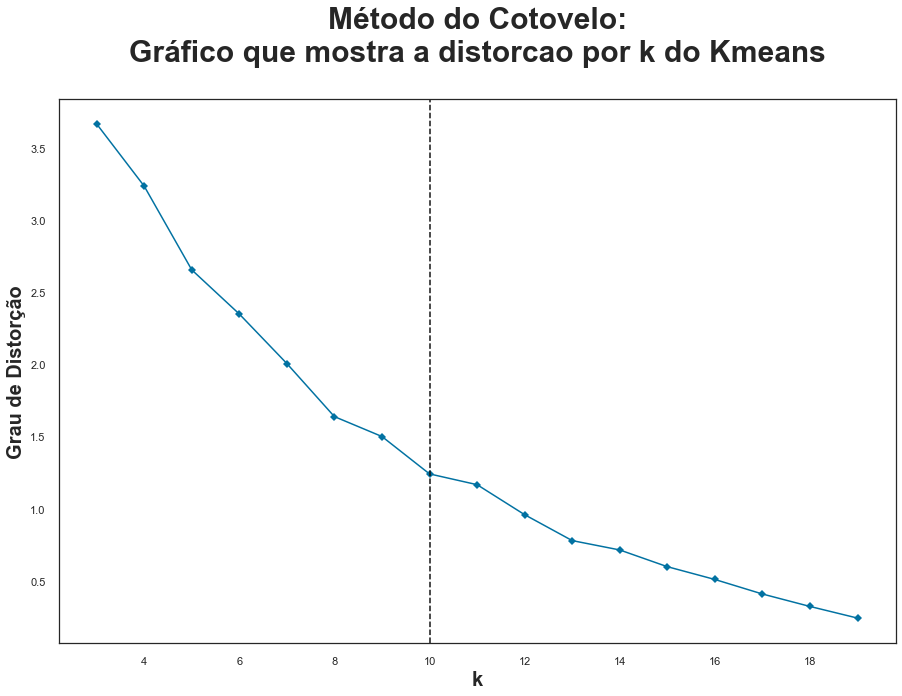

In [549]:
sns.set_theme(style="white", palette=None)

# Instantiate the clustering model and visualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(3,20), size=(1080, 720),                             
                             timings=False)

visualizer.fit(df_X_transform)        # Fit the data to the visualizer

visualizer.ax.set_title("Grau de Distorção",fontdict = {'fontsize':40,'fontweight':'bold'})
visualizer.ax.set_ylabel("Grau de Distorção",fontdict = {'fontsize':20,'fontweight':'bold'})
visualizer.ax.set_xlabel("k",fontdict = {'fontsize':20,'fontweight':'bold'})
# visualizer.show()        # Finalize and render the figure

plt.title('Método do Cotovelo:\nGráfico que mostra a distorcao por k do Kmeans\n', fontdict = {'fontsize':30, 'fontweight':'bold'})

**Melhor k para kmeans sobre o dataframe com os 5 componentes é 10**

In [587]:
# Gero 10 clusters para kmeans
k_means = KMeans(init = "k-means++", n_clusters = 10, n_init = 100,random_state=1)
k_means.fit(df_X_transform)
clusters = k_means.labels_

# Adiciono os clusters no dataframe com os 5 componentes:
df_X_transform['cluster']=clusters
df_X_transform.index = df_non_numerical.columns
df_X_transform.columns = ['Componente ' + str(x) for x in range(5)]+['cluster']
df_X_transform.sort_values(by=['cluster'])

,Componente 0,Componente 1,Componente 2,Componente 3,Componente 4,cluster
PavedDrive,-0.132550,0.056403,0.302847,-0.142129,0.337080,0
GarageCond,-0.160934,0.255445,0.055948,-0.357358,0.071400,0
ExterCond,0.021632,0.055339,0.248353,-0.339248,0.144556,0
LandSlope,0.170917,-0.190328,0.011089,-0.323525,-0.197028,1
FireplaceQu,0.347607,0.086538,0.164698,-0.152722,-0.221762,1
BsmtFinType1,-0.264268,-0.118185,-0.279888,0.037341,0.171200,2
LandContour,-0.209188,-0.382775,-0.132059,-0.039869,0.051923,2
BsmtExposure,-0.246502,-0.006154,-0.242472,-0.241582,-0.030079,2
OverallQual,0.264646,0.287702,-0.094628,0.073064,0.306631,3
GarageQual,-0.246857,0.294432,-0.028024,0.088767,-0.040650,3


# Segunda análise (acredito que faz mais sentido do que a primeira análise!):

## Avaliação da similaridade entre os exemplos considerando as distâncias através das variáveis não métricas

In [589]:
X_transform, stress = calculo_NMDS(df_non_numerical,2)
X_transform

array([[-0.0900494 ,  0.23355463],
       [-0.44217177, -0.14459939],
       [-0.27952464, -0.34474411],
       ...,
       [-0.74092959,  0.04523209],
       [-0.57287756, -0.06740905],
       [-0.65169088,  0.60116551]])

Text(0.5, 0, 'Componente 2')

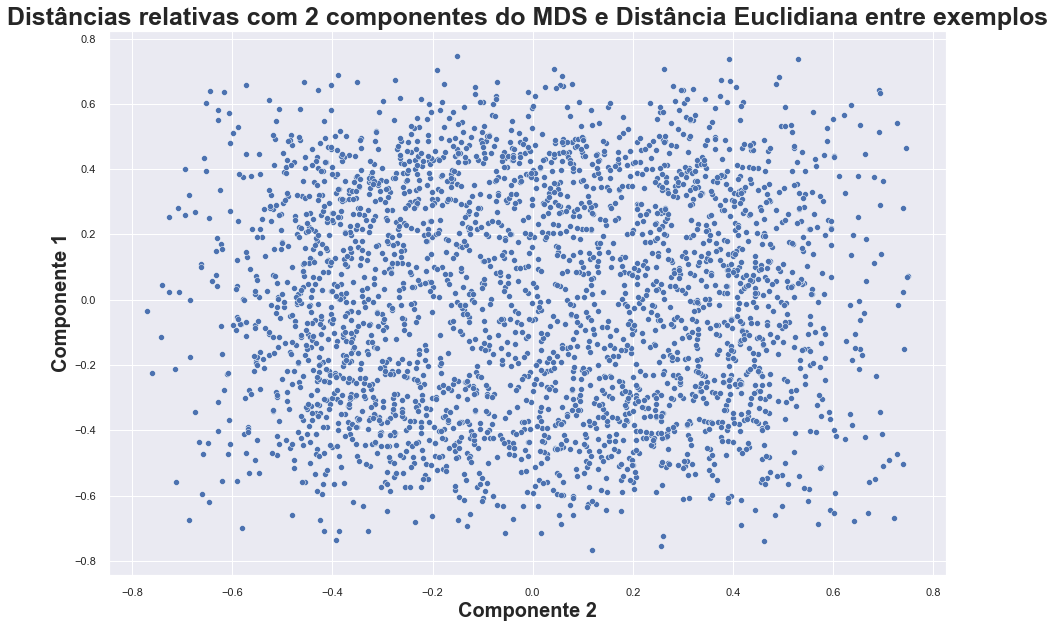

In [590]:
# sns.set_style('white')

df_points = pd.DataFrame(X_transform).reset_index()

sns.scatterplot(data=df_points, x=0, y=1, legend = False)

plt.title('Distâncias relativas com 2 componentes do MDS e Distância Euclidiana entre exemplos',fontdict = {'fontsize':25,'fontweight':'bold'})
plt.ylabel('Componente 1',fontdict = {'fontsize':20,'fontweight':'bold'})
plt.xlabel('Componente 2',fontdict = {'fontsize':20,'fontweight':'bold'})

**Visualmente, não conseguimos identificar nada com esta análise de apenas 2 componentes do MDS.**

In [592]:
print('Stress: {}'.format(stress))

Stress: 194416.59661457996


**Então, vamos tentar identificar o melhor número de componentes com baixo stress**

In [595]:
lista_stress = []
dimensao_max = 15
similarities = euclidean_distances(df_non_numerical)
for dimensoes in range(1, dimensao_max):
        nmds = manifold.MDS(
            n_components=dimensoes,
            metric=False,
            max_iter=3000,
            eps=1e-12,
            dissimilarity="precomputed",
            random_state=1,
            n_jobs=1,
            n_init=1,
        )        
        X_transform = nmds.fit_transform(similarities)
        stress = nmds.stress_
        lista_stress.append(stress)

Text(0.5, 0, 'Número de Componentes do MDS')

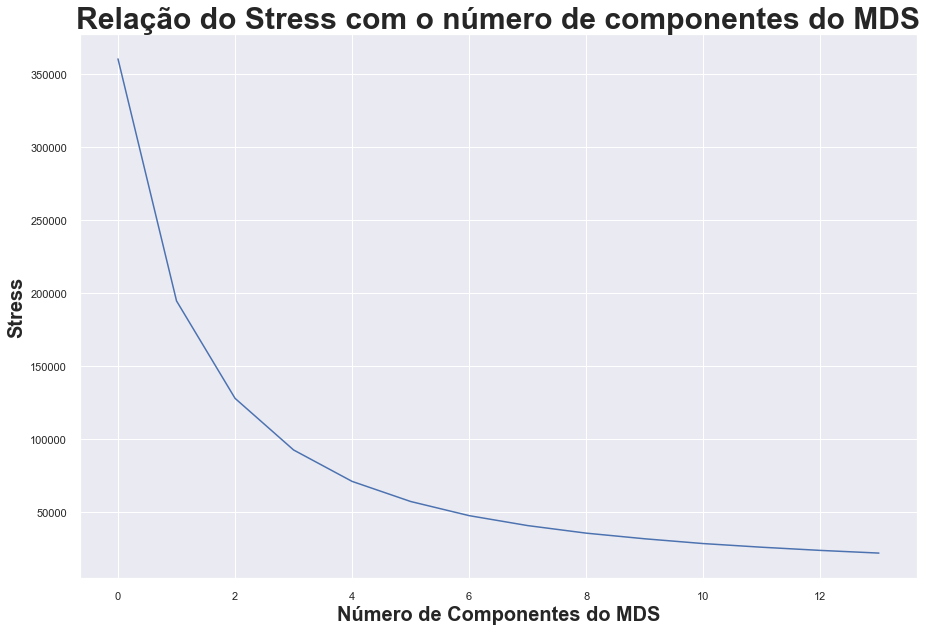

In [596]:
pd.DataFrame(lista_stress, columns=['Stress']).plot(kind='line', legend=False)
plt.title('Relação do Stress com o número de componentes do MDS',fontdict = {'fontsize':30,'fontweight':'bold'})
plt.ylabel('Stress',fontdict = {'fontsize':20,'fontweight':'bold'})
plt.xlabel('Número de Componentes do MDS',fontdict = {'fontsize':20,'fontweight':'bold'})

**Percebe-se que 6 é a melhor escolha como número de componentes do MDS, embora o stress esteja muito ruim, é nítida a formação de uma assíntota**

In [613]:
X_transform, stress = calculo_NMDS(df_non_numerical,6)
df_X_transform = pd.DataFrame(X_transform)

In [650]:
df_X_transform

,0,1,2,3,4,5
0,-0.051175,0.125750,-0.298897,-0.098288,-0.206136,-0.243944
1,-0.352496,-0.174833,-0.096784,0.045419,-0.087685,0.192191
2,-0.197446,0.247972,-0.321932,0.106938,-0.055814,0.028642
3,-0.216070,-0.193064,0.182197,0.284151,-0.102359,0.107357
4,0.180160,0.188521,-0.201030,-0.231010,-0.150534,0.182156
...,...,...,...,...,...,...
2909,-0.412490,0.363946,0.234704,0.031953,0.153548,-0.272621
2910,0.079399,0.108945,0.160095,-0.237441,-0.122496,-0.335378
2911,0.406840,0.179994,0.416928,0.329996,-0.408312,0.249000
2912,-0.153592,-0.430147,0.424740,-0.357037,0.332527,-0.262230


**Mas, fica difícil interpretar algo apenas com esta tabela**

# Então, vamos melhorar a interpretabilidade utilizando kmeans
## objetivo neste caso seria tentar avaliar os exemplos que ficaram mais próximos entre si via clusterização

Text(0.5, 1.0, 'Método do Cotovelo:\nGráfico que mostra a distorcao por k do Kmeans\n')

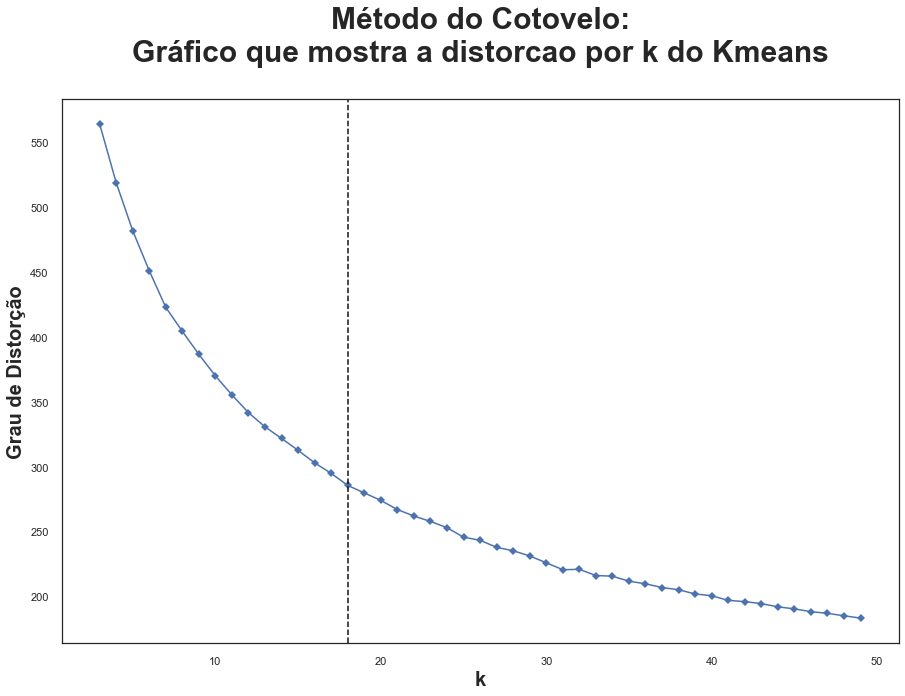

In [598]:
sns.set_theme(style="white", palette=None)

# Instantiate the clustering model and visualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(3,50), size=(1080, 720),                             
                             timings=False)

visualizer.fit(df_X_transform)        # Fit the data to the visualizer

visualizer.ax.set_title("Grau de Distorção",fontdict = {'fontsize':40,'fontweight':'bold'})
visualizer.ax.set_ylabel("Grau de Distorção",fontdict = {'fontsize':20,'fontweight':'bold'})
visualizer.ax.set_xlabel("k",fontdict = {'fontsize':20,'fontweight':'bold'})
# visualizer.show()        # Finalize and render the figure

plt.title('Método do Cotovelo:\nGráfico que mostra a distorcao por k do Kmeans\n', fontdict = {'fontsize':30, 'fontweight':'bold'})

**Melhor k para kmeans sobre o dataframe com os 6 componentes é 18, com a ajuda da biblioteca KElbowVisualizer que auxiliou na busca pelo melhor k, já que visualmente é inviável encontrar o ponto ideal para selecionar o melhor k**

In [623]:
# Gero 10 clusters para kmeans
k_means = KMeans(init = "k-means++", n_clusters = 18, n_init = 100,random_state=1)
k_means.fit(df_X_transform)
clusters = k_means.labels_

df_X_transform_cluster = df_X_transform.copy()

# Adiciono os clusters no dataframe com os 6 componentes:
df_X_transform_cluster['cluster']=clusters
df_X_transform_cluster.columns = ['Componente ' + str(x) for x in range(6)]+['cluster']
df_X_transform_cluster.sort_values(by=['cluster'])

,Componente 0,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,cluster
929,0.248957,-0.203763,0.218811,0.126762,0.029088,-0.243575,0
999,-0.197968,-0.241055,0.195386,-0.223651,0.224909,0.034894,0
2371,0.302368,-0.302031,0.073507,-0.078307,-0.145230,-0.238449,0
2822,0.252034,-0.107092,0.213477,-0.084325,0.374094,-0.229662,0
969,0.412279,0.030023,0.048385,-0.114061,0.161748,0.001681,0
...,...,...,...,...,...,...,...
2044,-0.045150,-0.021273,0.174107,0.363447,-0.228337,0.110113,17
411,-0.274136,0.229273,0.232714,0.136039,0.003503,0.116945,17
2676,-0.366963,0.316737,0.226887,0.211614,-0.011904,0.109002,17
2108,-0.234473,0.094670,0.220285,0.223930,0.202391,0.125884,17


In [635]:
# Normalizo os dados resultantes do MDS para 6 componentes e incluo o valor do cluster de cada exemplo
x = StandardScaler().fit_transform(df_non_numerical) # normalizing the features

df_non_numerical_cluster_normalizado = pd.DataFrame(x)
df_non_numerical_cluster_normalizado.columns = df_non_numerical.columns
df_non_numerical_cluster_normalizado['cluster']=clusters
df_non_numerical_cluster_normalizado

,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,...,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,cluster
0,-0.701743,-0.307728,-0.018528,-0.215610,-0.645291,0.513861,-1.039240,0.235898,-0.576816,-0.138539,...,-0.737422,-0.235519,0.979811,-0.315084,-0.277501,-0.267068,-0.312701,0.055111,0.477561,1
1,-0.701743,-0.307728,-0.018528,-0.215610,0.066434,-2.195530,0.688282,0.235898,-0.576816,-0.138539,...,0.773722,-0.235519,-0.681137,-0.315084,-0.277501,-0.267068,-0.312701,0.055111,0.477561,4
2,1.052012,-0.307728,-0.018528,-0.215610,-0.645291,0.513861,-1.039240,0.235898,-0.576816,-0.138539,...,-0.737422,-0.235519,-0.681137,-0.315084,-0.277501,-0.267068,-0.312701,0.055111,0.477561,1
3,1.052012,-0.307728,-0.018528,-0.215610,-0.645291,0.513861,0.688282,0.235898,0.532650,-1.893771,...,-0.737422,-0.235519,-1.234786,0.799181,-0.277501,-0.267068,-0.312701,0.055111,0.477561,3
4,1.052012,-0.307728,-0.018528,-0.215610,-1.357016,0.513861,-1.039240,0.235898,-0.576816,-0.138539,...,-0.737422,-0.235519,-0.681137,-0.315084,-0.277501,-0.267068,-0.312701,0.055111,0.477561,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,-0.701743,-0.307728,-0.018528,-0.215610,1.489884,-1.292400,0.688282,0.235898,0.532650,-0.138539,...,0.773722,-0.235519,0.979811,1.913447,3.912337,3.947213,-0.312701,0.055111,0.477561,6
2910,-0.701743,-0.307728,-0.018528,-0.215610,1.489884,0.513861,0.688282,0.235898,0.532650,-0.138539,...,0.773722,-0.235519,0.979811,0.799181,-0.277501,-0.267068,-0.312701,0.055111,0.477561,16
2911,-0.701743,-0.307728,-0.018528,-0.215610,0.778159,-1.292400,0.688282,0.235898,0.532650,-0.138539,...,0.773722,-0.235519,-0.681137,0.799181,-0.277501,-0.267068,-0.312701,0.055111,0.477561,9
2912,-0.701743,-0.307728,-0.018528,-0.215610,0.778159,0.513861,0.688282,0.235898,-0.576816,-0.138539,...,0.773722,-0.235519,0.979811,1.913447,3.912337,3.947213,-0.312701,0.055111,-1.985472,0


In [648]:
# Gero uma tabela com uma interpretação qualitativa de cada cluster de acordo com o valor normalizado da média de cada variável não métrica 

df_non_numerical_cluster_normalizado_media = df_non_numerical_cluster_normalizado.groupby(['cluster']).mean().transpose()

df_interpretacao_nmds_exemplos = pd.DataFrame()



for cluster_id in range(18):
    df_interpretacao_nmds_exemplos['Cluster ' + str(cluster_id)] = df_non_numerical_cluster_normalizado_media[cluster_id].apply(lambda x: 'Alta' if x > 0.1 else ('Média' if x > -0.1 else 'Baixa'))
    
df_interpretacao_nmds_exemplos.to_excel('df_interpretacao_nmds_exemplos.xlsx')
df_interpretacao_nmds_exemplos

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13,Cluster 14,Cluster 15,Cluster 16,Cluster 17
LotShape,Média,Baixa,Média,Média,Média,Baixa,Alta,Alta,Média,Média,Alta,Baixa,Média,Média,Média,Média,Média,Média
LandContour,Média,Alta,Média,Média,Média,Baixa,Média,Média,Média,Média,Alta,Média,Média,Média,Média,Média,Baixa,Média
Utilities,Média,Média,Média,Média,Média,Média,Média,Média,Média,Alta,Média,Média,Média,Média,Média,Média,Média,Média
LandSlope,Média,Média,Média,Média,Alta,Média,Média,Média,Média,Média,Média,Média,Média,Média,Média,Média,Média,Média
OverallQual,Média,Média,Baixa,Média,Média,Média,Média,Média,Média,Alta,Baixa,Média,Média,Média,Média,Média,Média,Média
OverallCond,Média,Baixa,Alta,Média,Média,Média,Média,Média,Média,Média,Média,Alta,Média,Alta,Média,Média,Baixa,Média
ExterQual,Média,Alta,Média,Média,Média,Média,Média,Média,Baixa,Alta,Média,Média,Média,Baixa,Média,Média,Alta,Média
ExterCond,Média,Média,Alta,Alta,Média,Baixa,Média,Média,Alta,Média,Média,Alta,Média,Média,Média,Média,Baixa,Média
BsmtQual,Média,Alta,Média,Média,Média,Média,Média,Média,Média,Alta,Média,Média,Média,Média,Média,Média,Média,Média
BsmtCond,Média,Alta,Média,Média,Baixa,Alta,Média,Alta,Média,Média,Média,Baixa,Média,Média,Média,Média,Média,Média


# Tentativa de visualizar os valores dos 17 clusters através do PCA de 2 componentes. O resultado foi péssimo! Difícil visualizar algum padrão usando esta técnica.

Text(0.5, 22.959999999999958, 'Componente_1')

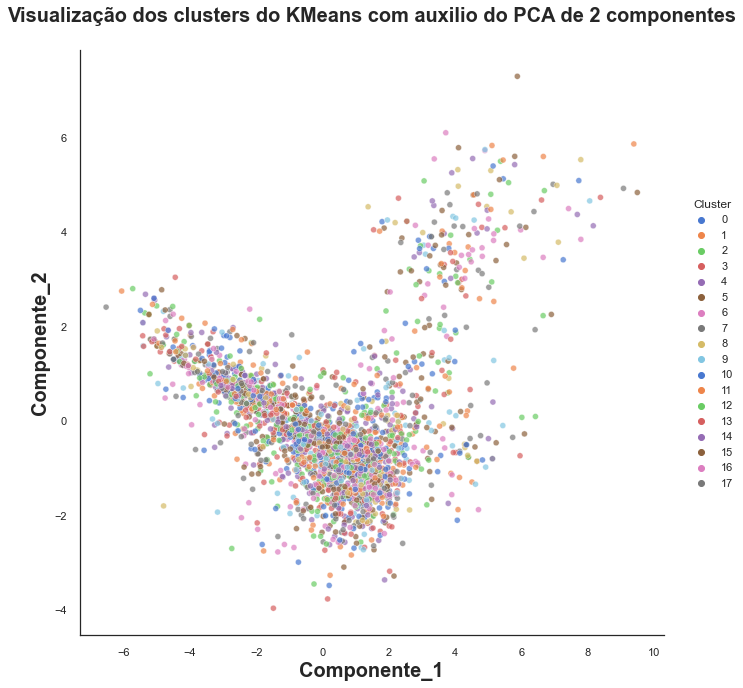

In [654]:

colunas = df_non_numerical_cluster_normalizado.columns
pca_cluster = PCA(n_components=2)
pca_cluster = pca_cluster.fit_transform(df_non_numerical_cluster_normalizado.drop('cluster',axis=1))
pca_cluster_final = pd.DataFrame(pca_cluster,columns=['Componente_1','Componente_2'])
pca_cluster_final['Cluster'] = df_non_numerical_cluster_normalizado['cluster']


sns.set_theme(style="white")

# plotar
sns.relplot(x="Componente_1", y="Componente_2", hue="Cluster",
            sizes=(60, 1000), alpha=.7, palette="muted",
            height=9, aspect=1, data=pca_cluster_final)

plt.title('Visualização dos clusters do KMeans com auxilio do PCA de 2 componentes\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Componente_2',fontdict = {'fontsize':20,'fontweight':'bold'})
plt.xlabel('Componente_1',fontdict = {'fontsize':20,'fontweight':'bold'})

# Conclusão
- Foi interessante realizar a análise MDS com 2 abordagens: avaliando a similaridade entre as variáveis não métricas e entre os exemplos
- A primeira abordagem nos mostrou variáveis que possuem grande similaridade entre si, a qual, numa análise mais rigorosa poderíamos avaliar o uso apenas de uma delas para não gerar sobreajuste nos cálculos e melhorar a interpretabilidade no sistema
- A segunda abordagem nos mostrou uma forma interessante de avaliar a proximidade entre os exemplos, o que nos permite também avaliar clusters através de variáveis não métricas. Contudo, para este conjunto de dados, esta abordagem não resultou em uma análise que fosse possível uma boa interpretação dos resultados, já que a divisão final entre os clusters não apresentou uma diferença clara.
- E por fim, este trabalho permitiu unir uma série de métodos e técnicas apresentadas ao longo da disciplina e integrá-las com o intuito de gerar algum valor estatístico e de interpretação no conjunto de dados utilizado.

# Possíveis desdobramentos:

- Avaliar outras medidas de distância como a Manhattan
- Tentar interpretar utilizar outros valores de números de componentes do MDS
- Tentar selecionar uma menor quantidade de variáveis não métricas, usando técnicas como Teste KMO (Kaiser-Meyer-Olkin), critério da raiz latente, etc.
- Para melhor a interpretação dos dados, utilizar análise de Clusters KMEANS com menores K, e PCA com mais componentes (até 3 pelo menos para possibilitar projeção no gráfico com 3 dimensões)